In [1]:
import sys
from pathlib import Path
print(Path().absolute())
sys.path.append(Path().absolute()) # set path to do imports below...
import inv_PPR_1909_xxxx_350k as ppr_350
import inv_03l_SchneidersSaddleryNNN_1905_xxxx_150k as schn_150
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# a = schn_150.Inv_03l_SchneidersSaddleryNNN()
# print(a.df)
# print(a.quarterly_to_month_end())
# b = ppr_350.Inv_02ac_PPR_Reliant()
# print(b.df)
# print(b.quarterly_to_month_end())

inv = []
inv.append( schn_150.Inv_03l_SchneidersSaddleryNNN() )
inv.append( ppr_350.Inv_02ac_PPR_Reliant() )

#print(inv[0].base.description)
#df_tot = inv[0].df

frames = [x.df for x in inv]
result = pd.concat(frames)

#print(result)

/Users/elee/01_git/test01/py_finance_sim_01


Plotting:

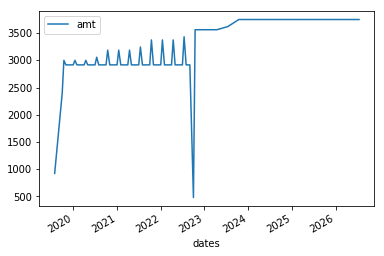

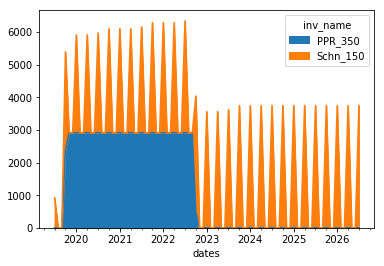

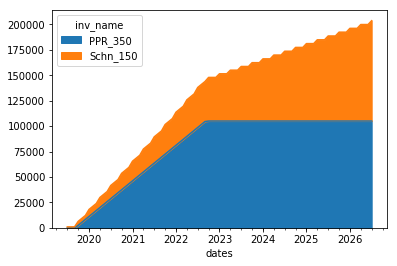

In [2]:
# Try several plots...

# This will sort by date (it appears), then plot
result.plot(kind='line', use_index=True, y='amt')
plt.show()

# https://python-graph-gallery.com/254-pandas-stacked-area-chart/
#print(result.pivot(columns='inv_name', values='amt').resample('m').sum() )#.rolling('Q').mean())

# Shows payments, but some are monthly, some quarterly.  
# Not intuitive to see "monthly income".  Want to "normalize" better to "see".
result.pivot(columns='inv_name', values='amt').resample('m').sum().plot.area()

#print( result.pivot(columns='inv_name', values='amt').resample('m').sum() )
#print(result.pivot(columns='inv_name', values='amt').resample('m').sum().rolling(window=3).mean())
#result.pivot(columns='inv_name', values='amt').resample('m').sum().rolling(window=3).mean().plot.area() 

# Pretty good, shows growth over time, integrated view.  
result.pivot(columns='inv_name', values='amt').resample('m').sum().cumsum().plot.area()

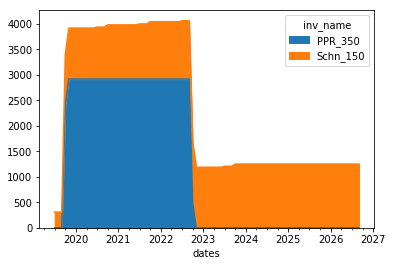

In [3]:
#Try to smooth quarterly payments! Convert to month-end.

result_monthly = pd.concat([a.quarterly_to_month_end() for a in inv], sort=True)
#result_monthly.plot()
#print(result_monthly)

# This is a "stacked bar" plot, showing the TOTAL, broken down by color.
result_monthly.pivot(columns='inv_name', values='amt').plot.area()


In [4]:
# tests
# redo kaggle
# add more investments
# HOW to resample well?  